In [52]:
import pandas as pd
from matplotlib import pyplot as plt

In [59]:
df=pd.read_csv("/content/drive/MyDrive/sms spam/spam.csv",encoding="ISO-8859-1")

In [54]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(columns=['Unnamed: 2'	,'Unnamed: 3',	'Unnamed: 4'],inplace=True)


In [62]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [63]:
df=df.rename(columns={'v1':'target','v2':'msg'})

In [64]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()


In [65]:
df['target']=le.fit_transform(df['target'])
df.head()

,target,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [67]:
df.isnull().sum()

target    0
msg       0
dtype: int64

In [70]:
df.duplicated().sum()

0

In [69]:
df=df.drop_duplicates(keep="first")

In [71]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [90]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['words']=df['msg'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df['characters']=df['msg'].apply(len)

In [80]:
df.head()

,target,msg,words,characters
0,0,"Go until jurong point, crazy.. Available only ...",24,111
1,0,Ok lar... Joking wif u oni...,8,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155
3,0,U dun say so early hor... U c already then say...,13,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61


In [81]:
df['sentences']=df['msg'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-81-9006b49a4f28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentences']=df['msg'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [82]:
df.head()

,target,msg,words,characters,sentences
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2
1,0,Ok lar... Joking wif u oni...,8,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2
3,0,U dun say so early hor... U c already then say...,13,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1


In [83]:
import seaborn as sns

<Axes: xlabel='characters', ylabel='Count'>

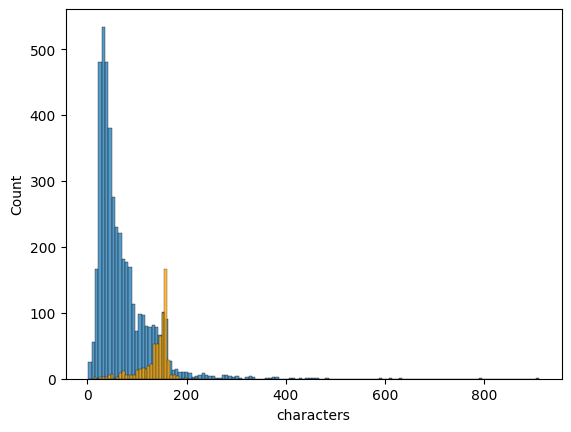

In [85]:
sns.histplot(df[df['target']==0]['characters'])
sns.histplot(df[df['target']==1]['characters'],color='orange')

<ipython-input-86-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

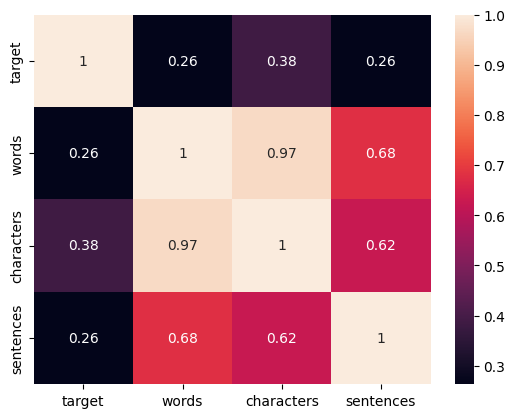

In [86]:
sns.heatmap(df.corr(),annot=True)

In [101]:
import string
nltk.download('stopwords')
def transform(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

    text=y[:]
  y.clear()

  ps=PorterStemmer()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:
df['tranformed_text']=df['msg'].apply(transform)

<ipython-input-102-5a6f75270235>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tranformed_text']=df['msg'].apply(transform)


In [103]:
df.head()

,target,msg,words,characters,sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,29,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,49,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1,nah think goe usf live around though


In [105]:
spam=[]
for msg in df[df['target']==1]['tranformed_text'].tolist():
  for word in msg.split():
    spam.append(word)

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer(max_features=3000)

In [111]:
x=tfid.fit_transform(df['tranformed_text']).toarray()

In [109]:
y=df['target'].values

In [112]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [116]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score
mnb=MultinomialNB()

In [120]:
mnb.fit(xtrain,ytrain)
ypred=mnb.predict(xtest)
print(accuracy_score(ytest,ypred))
print(precision_score(ytest,ypred))

0.9729206963249516
0.9915966386554622
